# Spotted the fraudsters

Let's look in detail at a full solution for the previous activities you completed on the credit card dataset.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('DLAS01_M1_WK4_LS2_A02.csv', encoding='latin1')
print(dataset.head(10))

                    CC            No   Money               City  \
0             5.11E+15  1.610000e+12  $6,871             Amlwch   
1  5294 4409 1242 9950  1.680000e+12  $7,965      North Saanich   
2             5.38E+15  1.650000e+12  $7,927             Amlwch   
3             5.53E+15  1.630000e+12  $9,525               Ajax   
4             5.57E+15  1.630000e+12  $7,008  Pont-Saint-Martin   
5             5.15E+15  1.650000e+12  $5,138             Amlwch   
6    514515 2300050725  1.650000e+12  $6,921               Ajax   
7  5288 2331 4441 1377  1.640000e+12  $7,821  Pont-Saint-Martin   
8   538649 550458 1435  1.680000e+12  $7,426             Canoas   
9   522306 558047 9692  1.650000e+12  $7,344             Canoas   

             Phone  Fraud  
0    070 2858 8300      1  
1     07588 093717      1  
2    0800 236 8313      1  
3  (0116) 834 5299      0  
4    (016977) 0477      1  
5      0500 593141      0  
6        0800 1111      0  
7    0933 242 2375      1  
8       08

## Converting alphanumeric into numeric variables

The money variable is numeric, but not in the right format. We can see that, first of all, it contains a dollar sign, which prevents it from being read as a number. Secondly, the comma is incorporated in the text as well. We need to address both of these issues.

In [2]:
# Removing the dollar sign by treating the value as a string and only selecting
# the characters after the first one (which is the dollar sign)
money = []
for amount in dataset['Money']:
    money.append(amount[1:])

# Next, remove the comma and transform the text into an integer
for index, amount in enumerate(money):
    money[index] = int(amount.replace(',',''))
dataset['Money'] = money
dataset['Money'].head()

0    6871
1    7965
2    7927
3    9525
4    7008
Name: Money, dtype: int64

In [3]:
dataset.head()

,CC,No,Money,City,Phone,Fraud
0,5.11E+15,1.610000e+12,6871,Amlwch,070 2858 8300,1
1,5294 4409 1242 9950,1.680000e+12,7965,North Saanich,07588 093717,1
2,5.38E+15,1.650000e+12,7927,Amlwch,0800 236 8313,1
3,5.53E+15,1.630000e+12,9525,Ajax,(0116) 834 5299,0
4,5.57E+15,1.630000e+12,7008,Pont-Saint-Martin,(016977) 0477,1


## Removing variables that have no predictive value

Let's look at the number of unique values per variable:

In [3]:
for var in dataset.columns:
    print(var, ' ', len(dataset[var].unique()))

CC   97
No   9
Money   98
City   5
Phone   95
Fraud   2


The unique values per variable indicate that the categorical variables CC and Phone are containing almost only unique values (we have 99 observations). For the continuous variables, No and Money, this is not a problem of course. Hence, we are going to remove CC and Phone.

In [5]:
dataset_cleanest = dataset.drop(['CC','Phone'], axis=1)
dataset_cleanest.head(10)

,No,Money,City,Fraud
0,1.610000e+12,6871,Amlwch,1
1,1.680000e+12,7965,North Saanich,1
2,1.650000e+12,7927,Amlwch,1
3,1.630000e+12,9525,Ajax,0
4,1.630000e+12,7008,Pont-Saint-Martin,1
5,1.650000e+12,5138,Amlwch,0
6,1.650000e+12,6921,Ajax,0
7,1.640000e+12,7821,Pont-Saint-Martin,1
8,1.680000e+12,7426,Canoas,1
9,1.650000e+12,7344,Canoas,1


## Removing outliers

Add a column called 'outlier' to the dataset containing a -1/1 flag for outliers:

In [8]:
from sklearn.neighbors import LocalOutlierFactor

# Copy dataset and only retain continuous variables
dataset_no_out = dataset_cleanest.copy()[['No', 'Money']]
    
loc = LocalOutlierFactor(n_neighbors = 20, contamination = 0.2)
outliers_loc = loc.fit_predict(dataset_no_out)
dataset_no_out['outlier'] = pd.DataFrame(outliers_loc)

In [10]:
dataset_no_out.head()

,No,Money,outlier
0,1.610000e+12,6871,-1
1,1.680000e+12,7965,1
2,1.650000e+12,7927,1
3,1.630000e+12,9525,1
4,1.630000e+12,7008,1


In [9]:
dataset_no_out['outlier'].value_counts()

 1    80
-1    19
Name: outlier, dtype: int64

Let's visualise this:

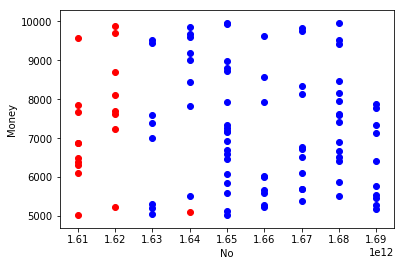

In [7]:
for index, obs in dataset_no_out.iterrows():
    if obs['outlier'] > 0:
        plt.scatter(obs[0], obs[1], color='blue') #not outlier
    else:
        plt.scatter(obs[0], obs[1], color='red') #outlier
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

With other parameters:

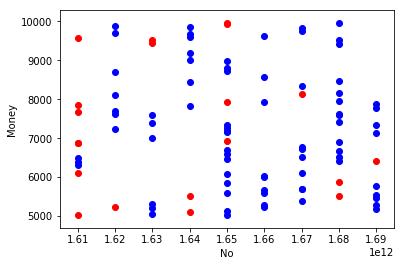

In [7]:
loc = LocalOutlierFactor(n_neighbors = 2, contamination = 0.2)
outliers_loc = loc.fit_predict(dataset_no_out)
dataset_no_out['outlier'] = pd.DataFrame(outliers_loc)

for index, obs in dataset_no_out.iterrows():
    if obs['outlier'] > 0:
        plt.scatter(obs[0], obs[1], color='blue') # not outlier
    else:
        plt.scatter(obs[0], obs[1], color='red') #outlier
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

By using a Gaussian distribution:

/usr/local/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (60.615497494246760 > 60.369276654294410). You may want to try with a higher value of support_fraction (current value: 0.525).
  RuntimeWarning)
/usr/local/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (60.615497494246760 > 60.509251033062235). You may want to try with a higher value of support_fraction (current value: 0.525).
  RuntimeWarning)
/usr/local/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (60.514937428305664 > 60.468222709128753). You may want to try with a higher value of support_fraction (current value: 0.525).
  RuntimeWarning)


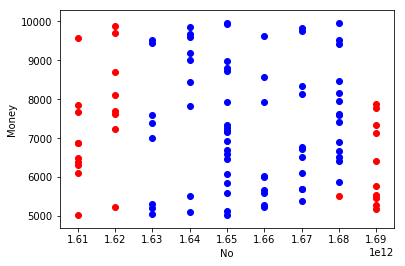

In [8]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination = 0.3)
outliers_loc = ee.fit_predict(dataset_no_out)
dataset_no_out['outlier'] = pd.DataFrame(outliers_loc)

for index, obs in dataset_no_out.iterrows():
    if obs['outlier'] > 0:
        plt.scatter(obs[0], obs[1], color='blue') #not outlier
    else:
        plt.scatter(obs[0], obs[1], color='red') #outlier
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

## Transforming numeric variables

Applying standardisation is simple:

In [9]:
from sklearn.preprocessing import StandardScaler

dataset_trans = dataset_no_out.copy()
ss = StandardScaler()

# Note that we only retain the continuous variables
dataset_trans = ss.fit_transform(dataset_trans[['No','Money']])
dataset_trans = pd.DataFrame(data = dataset_trans, columns = ['No', 'Money'])
dataset_trans.head()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,No,Money
0,-1.716197,-0.254860
1,1.095445,0.468902
2,-0.109545,0.443762
3,-0.912871,1.500958
4,-0.912871,-0.164224


Visualisation:

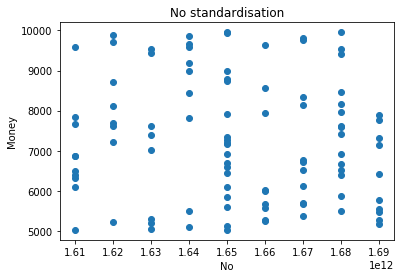

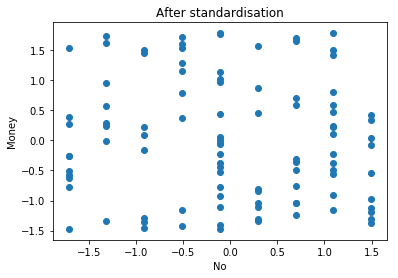

In [10]:
plt.scatter(dataset_no_out['No'], dataset_no_out['Money'])
plt.title('No standardisation')
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

plt.scatter(dataset_trans['No'], dataset_trans['Money'])
plt.title('After standardisation')
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

Using min-max scaling:

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


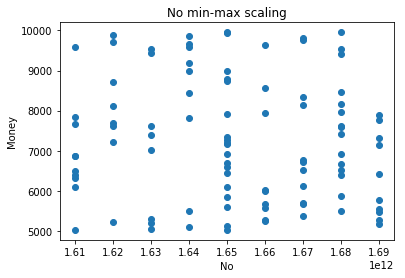

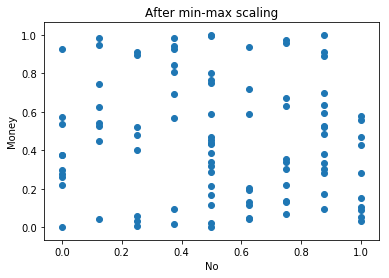

In [11]:
from sklearn.preprocessing import MinMaxScaler

dataset_trans = dataset_no_out.copy()
mms = MinMaxScaler()

# Note that we onyl retain the continuous variables
dataset_trans = mms.fit_transform(dataset_trans[['No','Money']])
dataset_trans = pd.DataFrame(data = dataset_trans, columns = ['No', 'Money'])

plt.scatter(dataset_no_out['No'], dataset_no_out['Money'])
plt.title('No min-max scaling')
plt.xlabel('No')
plt.ylabel('Money')
plt.show()

plt.scatter(dataset_trans['No'], dataset_trans['Money'])
plt.title('After min-max scaling')
plt.xlabel('No')
plt.ylabel('Money')
plt.show()